## Import required libraries

In [223]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir('/home/sachin/Desktop/DIP/IndianSign')
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

## Store data, labels in the list

In [224]:
data = []
labels = []
classes = ["award","bowl","burger","doctor","fight","ghost","gift","good","help","i","like","meet","promise","same","snake","study","wait"]
cur_path = os.getcwd()

In [225]:
cur_path

'/home/sachin/Desktop/DIP/Traffic_Signs_WebApp'

## Preprocess the images

In [226]:
for i in classes:
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path +"/" + a)
            image = image.resize((50,50))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

## Converting lists into numpy arrays

In [227]:
data = np.array(data)
labels = np.array(labels)

## Save Labels & Data for future use

In [228]:
# os.mkdir('training')

np.save('./training/data',data)
np.save('./training/target',labels)

## Load data & Labels

In [229]:
data=np.load('./training/data.npy')
labels=np.load('./training/target.npy')
# doctor , hands , itch , maximum , wednesday,welcome , wood;

In [230]:
lut = np.sort(np.unique(labels))
ind = np.searchsorted(lut,labels)
labels = ind
print(labels)
# print(data.shape, labels.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]


In [231]:
X_t, X_test, y_t, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)
X_train,X_val,y_train,y_val = train_test_split(X_t,y_t,test_size=0.3,random_state=0)

In [232]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(y_train)
print(y_test)

(224, 50, 50, 3) (81, 50, 50, 3) (224,) (81,)
[6 6 1 6 4 2 0 1 2 4 0 5 1 5 5 5 2 2 3 1 1 4 4 2 3 6 1 6 4 0 4 0 3 4 0 1 3
 6 4 5 2 1 4 5 6 3 6 4 3 3 2 4 3 0 2 4 5 6 1 0 1 0 4 4 6 6 3 4 6 3 5 6 0 5
 1 6 5 4 1 2 2 5 0 6 2 3 0 4 4 3 4 4 6 5 3 6 1 1 5 3 2 4 4 6 3 1 4 5 3 0 6
 1 4 2 3 0 1 0 0 1 1 2 0 4 5 4 0 0 0 6 2 6 2 4 6 3 4 5 6 3 3 2 2 5 6 0 2 4
 3 4 6 1 4 4 3 1 4 3 0 3 4 0 1 2 2 4 1 6 0 6 3 5 2 5 6 4 6 6 0 0 4 3 2 0 4
 6 1 6 6 0 5 5 3 1 6 0 2 5 0 6 0 0 3 1 3 1 1 4 0 3 1 5 1 1 6 0 2 3 1 1 6 2
 4 0]
[3 6 1 1 1 5 3 3 2 5 0 6 3 2 0 5 5 2 3 2 1 6 2 6 3 4 2 0 3 1 1 3 2 5 1 5 4
 3 3 1 4 2 4 0 0 5 1 0 2 5 2 5 6 2 5 6 2 4 0 0 0 0 4 2 0 3 4 5 6 0 2 2 2 0
 0 1 0 1 0 4 5]


## Convert labels to onehot encoding

In [233]:
y_train = to_categorical(y_train, 7)
y_val =to_categorical(y_val, 7)
#y_test = to_categorical(y_test, 7)

## Now it's time to build the model

In [234]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(7, activation='softmax'))

In [235]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [236]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/20
7/7 [==============================] - 2s 181ms/step - loss: 28.0454 - accuracy: 0.1562 - val_loss: 1.9867 - val_accuracy: 0.2165
Epoch 2/20
7/7 [==============================] - 1s 174ms/step - loss: 2.0874 - accuracy: 0.1741 - val_loss: 1.9430 - val_accuracy: 0.1546
Epoch 3/20
7/7 [==============================] - 1s 187ms/step - loss: 1.9398 - accuracy: 0.2366 - val_loss: 1.9489 - val_accuracy: 0.1340
Epoch 4/20
7/7 [==============================] - 1s 216ms/step - loss: 1.9415 - accuracy: 0.2009 - val_loss: 1.9525 - val_accuracy: 0.1237
Epoch 5/20
7/7 [==============================] - 1s 196ms/step - loss: 1.9419 - accuracy: 0.1964 - val_loss: 1.9559 - val_accuracy: 0.1443
Epoch 6/20
7/7 [==============================] - 1s 170ms/step - loss: 1.9541 - accuracy: 0.2411 - val_loss: 1.9417 - val_accuracy: 0.2784
Epoch 7/20
7/7 [==============================] - 1s 165ms/step - loss: 1.8952 - accuracy: 0.2991 - val_loss: 2.0571 - val_accuracy: 0.2062
Epoch 8/20
7/7 [===

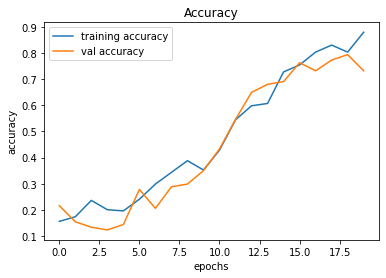

In [237]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

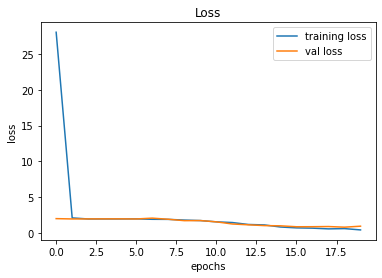

In [238]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## LEt's do testing on Test data

In [239]:
# def testing(testcsv):
#     y_test = pd.read_csv(testcsv)
#     label = y_test["ClassId"].values
#     imgs = y_test["Path"].values
#     data=[]
#     for img in imgs:
#         image = Image.open(img)
#         image = image.resize((30,30))
#         data.append(np.array(image))
#     X_test=np.array(data)
#     return X_test,label

In [240]:
#X_test, label = testing('Test.csv')

In [241]:
pred = model.predict(X_test)
Y_pred = np.argmax(pred,axis=1)
print(Y_pred)
print(y_test)


[3 6 6 1 1 3 1 3 2 5 0 6 3 2 0 5 6 4 0 4 1 6 2 6 3 4 2 0 3 1 1 4 2 5 6 5 4
 3 0 1 4 4 4 0 0 5 1 0 2 5 4 5 0 2 5 6 2 4 2 0 4 4 4 0 2 3 4 4 6 0 2 1 2 0
 0 1 0 1 4 4 5]
[3 6 1 1 1 5 3 3 2 5 0 6 3 2 0 5 5 2 3 2 1 6 2 6 3 4 2 0 3 1 1 3 2 5 1 5 4
 3 3 1 4 2 4 0 0 5 1 0 2 5 2 5 6 2 5 6 2 4 0 0 0 0 4 2 0 3 4 5 6 0 2 2 2 0
 0 1 0 1 0 4 5]


## Accuracy with the test data

In [242]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, Y_pred))

0.7407407407407407


## Save the model

In [243]:
model.save("./training/TSR.h5")

## Load the Model

In [244]:
import os
os.chdir(r'/home/sachin/Desktop/DIP/IndianSign')
from keras.models import load_model
model = load_model('./training/TSR.h5')

In [245]:
# Classes of hand signs
classes = { 0:'doctor',
            1:'hands', 
            2:'itch', 
            3:'maximum', 
            4:'wednesday', 
            5:'welcome', 
            6:'wood' 
            }

In [246]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((50,50))
    data.append(np.array(image))
    X_test=np.array(data)
    pred = model.predict(X_test)
    Y_pred = np.argmax(pred,axis=1)
    return image,Y_pred

Predicted sign :  maximum


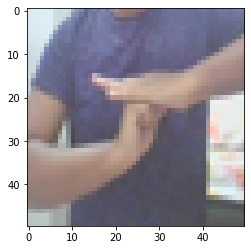

In [251]:
plot,prediction = test_on_img(r'/home/sachin/Desktop/DIP/IndianSign/2022-05-13-023053.jpg')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted sign : ", classes[a])
plt.imshow(plot)
plt.show()